## 오픈소스 프로젝트

In [2]:
# 모듈 import, 필요에 따라 더 추가
import re
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score

plt.style.use('seaborn')
sns.set(font="NanumGothic",rc={"axes.unicode_minus":False})

#### 데이터셋 불러오기
###### trafficDay=서울시 일일 버스 이용량 데이터
###### weather=서울시 강수 정보

In [3]:
forders_time=os.listdir("서울특별시 공공자전거 이용정보(시간대별)_2021년")
forders_month=os.listdir("서울특별시 공공자전거 이용정보(월별)_2021년")
df_day=pd.read_csv("서울특별시 공공자전거 이용정보(시간대별)_21.01.csv",encoding='cp949')
df_month=pd.DataFrame()
df_cor=pd.read_csv("서울특별시 공공자전거 이용정보(시간대별)_2021년/서울특별시 공공자전거 이용정보(시간대별)_21.12.csv",encoding='cp949')
df_location=pd.read_csv("공공자전거 대여소 정보(21.12월 기준).csv",encoding='cp949')
df_member=pd.read_csv("서울특별시 공공자전거 신규가입자 정보(일별).csv",encoding='cp949')

for i in range(len(forders_month)):
    file="서울특별시 공공자전거 이용정보(월별)_2021년/"+forders_month[i]
    df=pd.read_csv(file,encoding="cp949")
    df_month=pd.concat([df_month,df])

#### 데이터 셋 확인
###### 어떤 데이터들이 있는지 확인해보기 위해 맨 위의 5개의 행을 불러온다.

In [4]:
df_day.head(3)

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2021-01-01,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,NaN,~10대,2,28.90,0.23,992.78,13
1,2021-01-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,NaN,~10대,1,34.38,0.26,1127.50,10
2,2021-01-01,0,1168,1168. 마곡엠밸리10단지 앞,정기권,NaN,~10대,1,0.00,0.00,0.00,7


In [5]:
df_month.head(3)

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),이용거리(M),이용시간(본)
0,2021-01,3,중랑센터,일일(회원),M,AGE_003,2,47.68,0.40,1720.00,25.0,NaN,NaN
1,2021-01,3,중랑센터,정기,M,AGE_003,11,578.98,2.87,12390.48,166.0,NaN,NaN
2,2021-01,3,중랑센터,정기,M,AGE_004,1,81.65,0.53,2291.05,13.0,NaN,NaN


In [6]:
df_location.head()

,대여소\n번호,보관소(대여소)명,소재지(위치),Unnamed: 3,Unnamed: 4,Unnamed: 5,설치\n시기,설치형태,Unnamed: 8,운영\n방식
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LCD,QR,NaN
1,NaN,NaN,자치구,상세주소,위도,경도,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,거치\n대수,거치\n대수,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,102.0,망원역 1번출구 앞,마포구,서울특별시 마포구 월드컵로 72,37.5556488,126.9106293,2015-09-06,20,NaN,LCD


In [7]:
df_member.head()

,가입일자,사용자코드,연령대코드,성별,가입 수
0,2018-07-20,회원-내국인,10대,NaN,221
1,2018-07-20,회원-내국인,20대,NaN,1189
2,2018-07-20,회원-내국인,30대,NaN,348
3,2018-07-20,회원-내국인,40대,NaN,201
4,2018-07-20,회원-내국인,50대,NaN,91


In [8]:
df_day.describe(include=np.object_)
# 분석하면서 성별의 종류가 여러개가 나와서 확인해보니 4개이다.
# 이후 분석하면서 해당 문제를 해결

,대여일자,대여소명,대여구분코드,성별,연령대코드,운동량,탄소량
count,718857,718857,718857,401235,718857,718857,718857
unique,30,2188,4,4,7,51422,1333
top,2021-01-25,2102. 봉림교 교통섬,정기권,M,20대,0.00,0.00
freq,47304,1799,585211,262477,270097,73806,74193


In [9]:
df_cor.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2021-12-01,0,953,953. 서울연신초등학교,정기권,NaN,~10대,1,0.00,0.00,0.00,14
1,2021-12-01,0,1668,1668. 중계역 6번출구,정기권,NaN,~10대,1,30.60,0.28,1207.46,7
2,2021-12-01,0,1669,1669. 중계역 3번출구,정기권,NaN,~10대,1,26.03,0.25,1095.63,6
3,2021-12-01,0,280,280. 양평동6차현대아파트 앞,정기권,NaN,~10대,1,36.53,0.29,1230.00,7
4,2021-12-01,0,1184,1184. 마곡13단지,정기권,NaN,~10대,1,0.00,0.00,0.00,17


### 결측치 처리
###### 위의 데이터들을 확인한 후 결측치를 처리한다.

In [10]:
# df_month 결측치 확인(각 열별로 결측치가 몇개씩 존재하는지 확인)
df_month.isnull().sum()


대여일자             0
대여소번호            0
대여소명             0
대여구분코드           0
성별          172453
연령대코드            0
이용건수             0
운동량              0
탄소량              0
이동거리(M)     128413
이용시간(분)     128413
이용거리(M)    1195102
이용시간(본)    1195102
dtype: int64

In [11]:
# 결측치를 0으로 채운다.
df_month=df_month.fillna(0) #이후 결측치 처리는 이동거리/평균사용시간 분석에서 진행한다.

In [12]:
# 시간대별 데이터 결측치 개수 확인
df_day.isnull().sum()

대여일자           0
대여시간           0
대여소번호          0
대여소명           0
대여구분코드         0
성별        317622
연령대코드          0
이용건수           0
운동량            0
탄소량            0
이동거리           0
사용시간           0
dtype: int64

In [13]:
df_day=df_day.dropna()

In [14]:
df_cor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1519851 entries, 0 to 1519850
Data columns (total 12 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   대여일자    1519851 non-null  object 
 1   대여시간    1519851 non-null  int64  
 2   대여소번호   1519851 non-null  int64  
 3   대여소명    1519851 non-null  object 
 4   대여구분코드  1519851 non-null  object 
 5   성별      922567 non-null   object 
 6   연령대코드   1519851 non-null  object 
 7   이용건수    1519851 non-null  int64  
 8   운동량     1519851 non-null  object 
 9   탄소량     1519851 non-null  object 
 10  이동거리    1519851 non-null  float64
 11  사용시간    1519851 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 139.1+ MB


In [15]:
#운동량이 object형이므로 실수형으로 바꾸어 준다.
df_cor['운동량'][(df_cor['운동량']==r'\N')]=0
df_cor['운동량']=pd.to_numeric(df_cor['운동량'])
df_cor.info()

C:\Users\enqu7\AppData\Local\Temp\ipykernel_13752\2478797993.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cor['운동량'][(df_cor['운동량']==r'\N')]=0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1519851 entries, 0 to 1519850
Data columns (total 12 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   대여일자    1519851 non-null  object 
 1   대여시간    1519851 non-null  int64  
 2   대여소번호   1519851 non-null  int64  
 3   대여소명    1519851 non-null  object 
 4   대여구분코드  1519851 non-null  object 
 5   성별      922567 non-null   object 
 6   연령대코드   1519851 non-null  object 
 7   이용건수    1519851 non-null  int64  
 8   운동량     1519851 non-null  float64
 9   탄소량     1519851 non-null  object 
 10  이동거리    1519851 non-null  float64
 11  사용시간    1519851 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 139.1+ MB


In [16]:
df_cor.isnull().sum()

대여일자           0
대여시간           0
대여소번호          0
대여소명           0
대여구분코드         0
성별        597284
연령대코드          0
이용건수           0
운동량            0
탄소량            0
이동거리           0
사용시간           0
dtype: int64

In [17]:
df_cor=df_cor.dropna()

### 이동거리/평균사용시간이 높은 대여소는?

In [18]:
dfcount=df_month.loc[:,['대여소명']]
dfcount.value_counts()

대여소명               
Y                      123146
207. 여의나루역 1번출구 앞         873
502. 뚝섬유원지역 1번출구 앞        862
2622. 올림픽공원역 3번출구         829
583. 청계천 생태교실 앞           828
                        ...  
1114. 서남물재생센터 버스정류장         2
훈련원센터                       2
2918.골마을 근린공원               1
9990_도봉센터                   1
학여울센터                       1
Length: 2695, dtype: int64

In [17]:
# 현재 이동거리와 이용거리 둘 중 하나만 존재하므로 이를 더해서 이용건수로 나누어준 뒤, 필요한 열만 남긴다.
df_month['거리(M)']=(df_month['이동거리(M)']+df_month['이용거리(M)'])/df_month['이용건수']
dfDis=df_month.loc[:,['대여소명','거리(M)']]
dfDis

,대여소명,거리(M)
0,중랑센터,860.000000
1,중랑센터,1126.407273
2,중랑센터,2291.050000
3,상암센터 정비실,15209.580000
4,상암센터 정비실,2440.433333
...,...,...
102921,상담센터,1390.000000
102922,상담센터,230.100000
102923,상담센터,1595.000000
102924,88888.영남배송,0.000000


In [18]:
#각 대여소별 이용거리 평균을 내림차순으로 정렬한다. 그 후, 상위 10개의 행을 뽑아서 저장
disave=dfDis.groupby(['대여소명'],as_index=False).mean().sort_values(by='거리(M)',ascending=False)
disave=disave[:10]
disave

,대여소명,거리(M)
701,1858. 석수역1번출구 앞 (SK주유소),8347.416285
671,1827. 독산보도육교 앞 자전거 보관소,7503.337808
799,2025. 흑석역 1번출구,6985.098320
1621,3627. 압구정나들목,6807.122483
808,2037. 동작역 5번출구 동작주차공원,6739.656967
1661,3677. 강동구음식물재활용센터,6713.269398
704,1861.IBK기업은행 석수역 지점 앞,6702.037407
1028,2314. 청담나들목입구,6632.590357
2344,565. 옥수역 3번출구,6620.452153
2673,9990_도봉센터,6540.000000


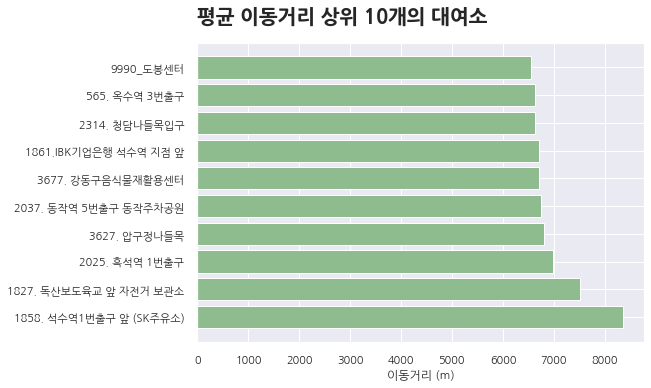

In [38]:
# 이동거리 시각화 (막대그래프 사용)
title_font = {'fontsize': 20,'fontweight': 'bold'}
title = plt.title('평균 이동거리 상위 10개의 대여소', fontdict=title_font, loc='left', pad=20)
plt.barh(disave['대여소명'],disave['거리(M)'],color='darkseagreen')
plt.xlabel('이동거리 (m)')
plt.show()

In [20]:
# 현재 이용시간(분)과 이용시간(본) 둘 중 하나만 존재하므로 이를 더해서 이용건수로 나눠준 뒤, 필요한 열만 남긴다.
df_month['이용시간 (분)']=(df_month['이용시간(분)']+df_month['이용시간(본)'])/df_month['이용건수']
df_time=df_month.loc[:,['대여소명','이용시간 (분)']]
df_time

,대여소명,이용시간 (분)
0,중랑센터,12.500000
1,중랑센터,15.090909
2,중랑센터,13.000000
3,상암센터 정비실,47.000000
4,상암센터 정비실,22.333333
...,...,...
102921,상담센터,15.500000
102922,상담센터,2.000000
102923,상담센터,14.000000
102924,88888.영남배송,17.000000


In [21]:
# 평균 이용시간 상위 10개의 대여소들을 출력한다.
timeave=df_time.groupby(['대여소명'],as_index=False).mean().sort_values(by='이용시간 (분)',ascending=False)
timeave=timeave[:10]
timeave

,대여소명,이용시간 (분)
2673,9990_도봉센터,69.000000
701,1858. 석수역1번출구 앞 (SK주유소),60.996900
808,2037. 동작역 5번출구 동작주차공원,56.252843
1014,2301. 현대고등학교 건너편,54.915696
1661,3677. 강동구음식물재활용센터,54.698919
671,1827. 독산보도육교 앞 자전거 보관소,54.032865
1573,3552.서울숲 공영주차장앞,53.362297
1621,3627. 압구정나들목,52.576397
978,2262. 한신16차아파트 119동 앞,52.538975
1153,249. 여의도중학교 옆,52.318514


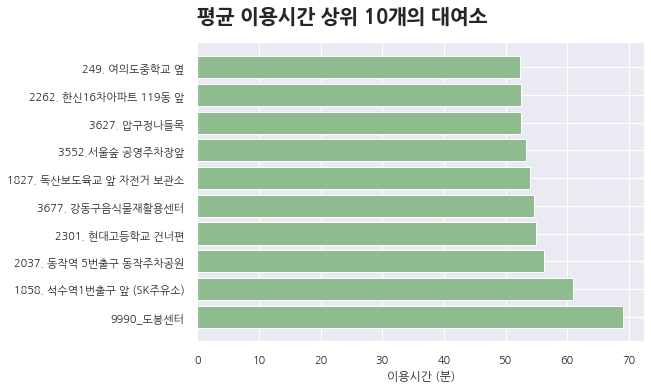

In [37]:
# 이용시간 시각화 (막대그래프 사용)
title_font = {'fontsize': 20,'fontweight': 'bold'}
title = plt.title('평균 이용시간 상위 10개의 대여소', fontdict=title_font, loc='left', pad=20)
plt.barh(timeave['대여소명'],timeave['이용시간 (분)'],color='darkseagreen')
plt.xlabel('이용시간 (분)')
plt.show()

### 운동량과 이동거리의 상관관계

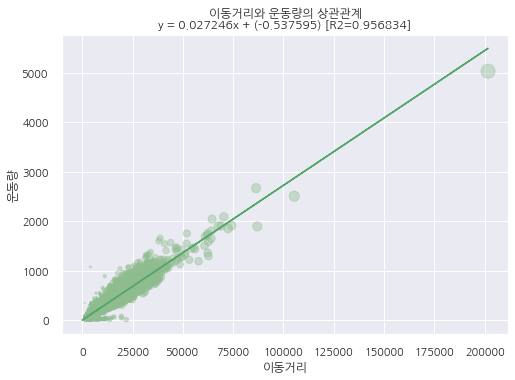

In [34]:
plt.scatter(x=df_cor['이동거리'],y=df_cor['운동량'],color='darkseagreen',alpha=0.4,s=df_cor['이동거리']//1000)
fit_mom=np.polyfit(df_cor['이동거리'],df_cor['운동량'],1)
trend_f=np.poly1d(fit_mom)
r2=r2_score(df_cor['운동량'],trend_f(df_cor['이동거리']))
plt.plot(df_cor['이동거리'],trend_f(df_cor['이동거리']),"g")
plt.xlabel('이동거리')
plt.ylabel('운동량')
plt.title("이동거리와 운동량의 상관관계\ny = %.6fx + (%.6f) [R2=%.6f]"%(fit_mom[0],fit_mom[1],r2))
plt.show()

### 따릉이를 가장 많이 이용하는 성별/연령대

In [40]:
# 분석에 필요한 컬럼인 성별과 이동거리 컬럼만 남긴다. 
dfsex=df_day.loc[:,['성별']]
dfsex.value_counts()

성별
M     262477
F     138500
m        212
f         46
dtype: int64

In [41]:
# f를 F로, m을 M으로 대체하는 작업을 한다.
dfsex=dfsex.replace({'성별':'f'},{'성별':'F'})
dfsex=dfsex.replace({'성별':'m'},{'성별':'M'})

In [42]:
df_sex=dfsex.value_counts(normalize=True)
df_sex

성별
M     0.654701
F     0.345299
dtype: float64

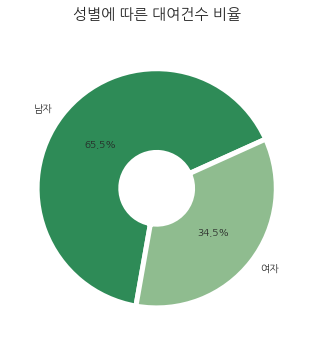

In [51]:
# 남녀 대여건수 비율을 원형 차트로 나타낸다.
ratio = [df_sex[0],df_sex[1]]
labels = ['남자', '여자']
colors = ['seagreen','darkseagreen']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
title_font = {'fontsize': 15}
title = plt.title('성별에 따른 대여건수 비율', fontdict=title_font, loc='center', pad=20)
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops,textprops={'size':10})
plt.show()

In [46]:
dfage=df_day.loc[:,['연령대코드']]
dfage.value_counts()

연령대코드
20대      134044
30대      110489
40대       76092
50대       47138
60대       16019
~10대      14860
70대~       2593
dtype: int64

In [47]:
dfage=dfage.replace({'연령대코드':'~10대'},{'연령대코드':'10대 이하'})
dfage=dfage.replace({'연령대코드':'70대~'},{'연령대코드':'70대 이상'})

In [48]:
dfage=dfage.value_counts(normalize=True)
dfage

연령대코드 
20대       0.334079
30대       0.275372
40대       0.189644
50대       0.117482
60대       0.039924
10대 이하    0.037036
70대 이상    0.006463
dtype: float64

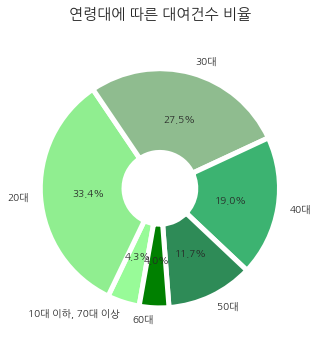

In [49]:
# 남녀 대여건수 비율을 원형 차트로 나타낸다.
ratio = [dfage[5]+dfage[6],dfage[0],dfage[1],dfage[2],dfage[3],dfage[4]]
labels = ['10대 이하, 70대 이상','20대', '30대','40대','50대','60대']
colors = ['palegreen','lightgreen','darkseagreen','mediumseagreen','seagreen','green']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
title_font = {'fontsize': 15}
title = plt.title('연령대에 따른 대여건수 비율', fontdict=title_font, loc='center', pad=20)
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops,textprops={'size':10})
plt.show()